# Explore the DataFrame

We want to get a solid understanding of the structure of our DF and its values before jumping into a deeper analysis. <br>
We use many of pandas handy functions to begin with basic analysis for the data, including inspecting column data types <br> and distributions, creating exploratory visualizations, and counting unique and missing values. 

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset into a DataFrame
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

# df = pd.concat([train, test], sort=False)
df = train.copy()

# Drop id column - id is not a feature
df = df.drop(['id'], axis=1)

# Print the number of rows and columns
print("Number of rows and columns:", df.shape)

# Print the first 10 rows
df.head(10)

Number of rows and columns: (365, 11)


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
5,1,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,1606
6,1,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,1510
7,1,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,959
8,1,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,822
9,1,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,1321


## Understanding columns and values
The [info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) function prints a concise summary of the DataFrame. For each column, we can find its name, data type, and the number of non-null rows.<br>  This is useful to gauge if there are many missing values and to understand what data we are dealing with. 

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      365 non-null    int64  
 1   mnth        365 non-null    int64  
 2   holiday     365 non-null    int64  
 3   weekday     365 non-null    int64  
 4   workingday  365 non-null    int64  
 5   weathersit  365 non-null    int64  
 6   temp        365 non-null    float64
 7   atemp       365 non-null    float64
 8   hum         365 non-null    float64
 9   windspeed   365 non-null    float64
 10  cnt         365 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 31.5 KB


### Data Fields

id         - Unique ID for each entry (numeric)
season     - 1 = spring, 2 = summer, 3 = fall, 4 = winter (categorial). <br>
mnth       - 1 = Januar ... 12 = December (numerical). <br>
holiday    - whether the day is considered a holiday (bool). <br>
Weekday    - 0 = Sunday ... 6 = Saturday (numeric). <br>
workingday - whether the day is neither a weekend nor holiday (bool). <br>
weathersit - (categorial). <br>
             1 = Clear, Few clouds, Partly cloudy, Partly cloudy <br>
             2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>
             3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
             4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
temp       - temperature in Celsius (numeric). <br>
atemp      - "feels like" temperature in Celsius (numeric). <br>
humidity   - relative humidity (numeric). <br>
windspeed  - wind speed (numeric). <br>
count      - number of total rentals (numeric). <br>

The [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function generates helpful descriptive statistics for each numeric column. We can see the percentile, mean, standard deviation, and minimum and maximum values in its output.

In [114]:
df.describe()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,3405.761644
std,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,1378.753666
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,431.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,2132.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,3740.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,4586.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,6043.000000


To get an exact count of missing values in each column, we call the [isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) function and aggregate it using the [sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) function:

In [115]:
df.isna().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [116]:
def print_by_function(df, function):
    """Generic function to print the result of a function on a DataFrame"""
    print(f'Applying {function.__name__} function to the dataframe')
    for col in df.columns:
        returned_value = function(df[col])
        if len(returned_value) < 20:
            print(col, returned_value, end='\n\n')

We can explore the unique values of each columns by calling the [unique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html) function.

In [117]:
print_by_function(df, pd.unique)

Applying unique function to the dataframe
season [1 2 3 4]

mnth [ 1  2  3  4  5  6  7  8  9 10 11 12]

holiday [0 1]

weekday [6 0 1 2 3 4 5]

workingday [0 1]

weathersit [2 1 3]



We use the [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) function to print out the number of rows for each unique value:

In [118]:
print_by_function(df, pd.value_counts)

Applying value_counts function to the dataframe
season 3    94
2    92
1    90
4    89
Name: season, dtype: int64

mnth 1     31
3     31
5     31
7     31
8     31
10    31
12    31
4     30
6     30
9     30
11    30
2     28
Name: mnth, dtype: int64

holiday 0    355
1     10
Name: holiday, dtype: int64

weekday 6    53
0    52
1    52
2    52
3    52
4    52
5    52
Name: weekday, dtype: int64

workingday 1    250
0    115
Name: workingday, dtype: int64

weathersit 1    226
2    124
3     15
Name: weathersit, dtype: int64



## Basic data visualizations

Boxplots can help you identify outliers:

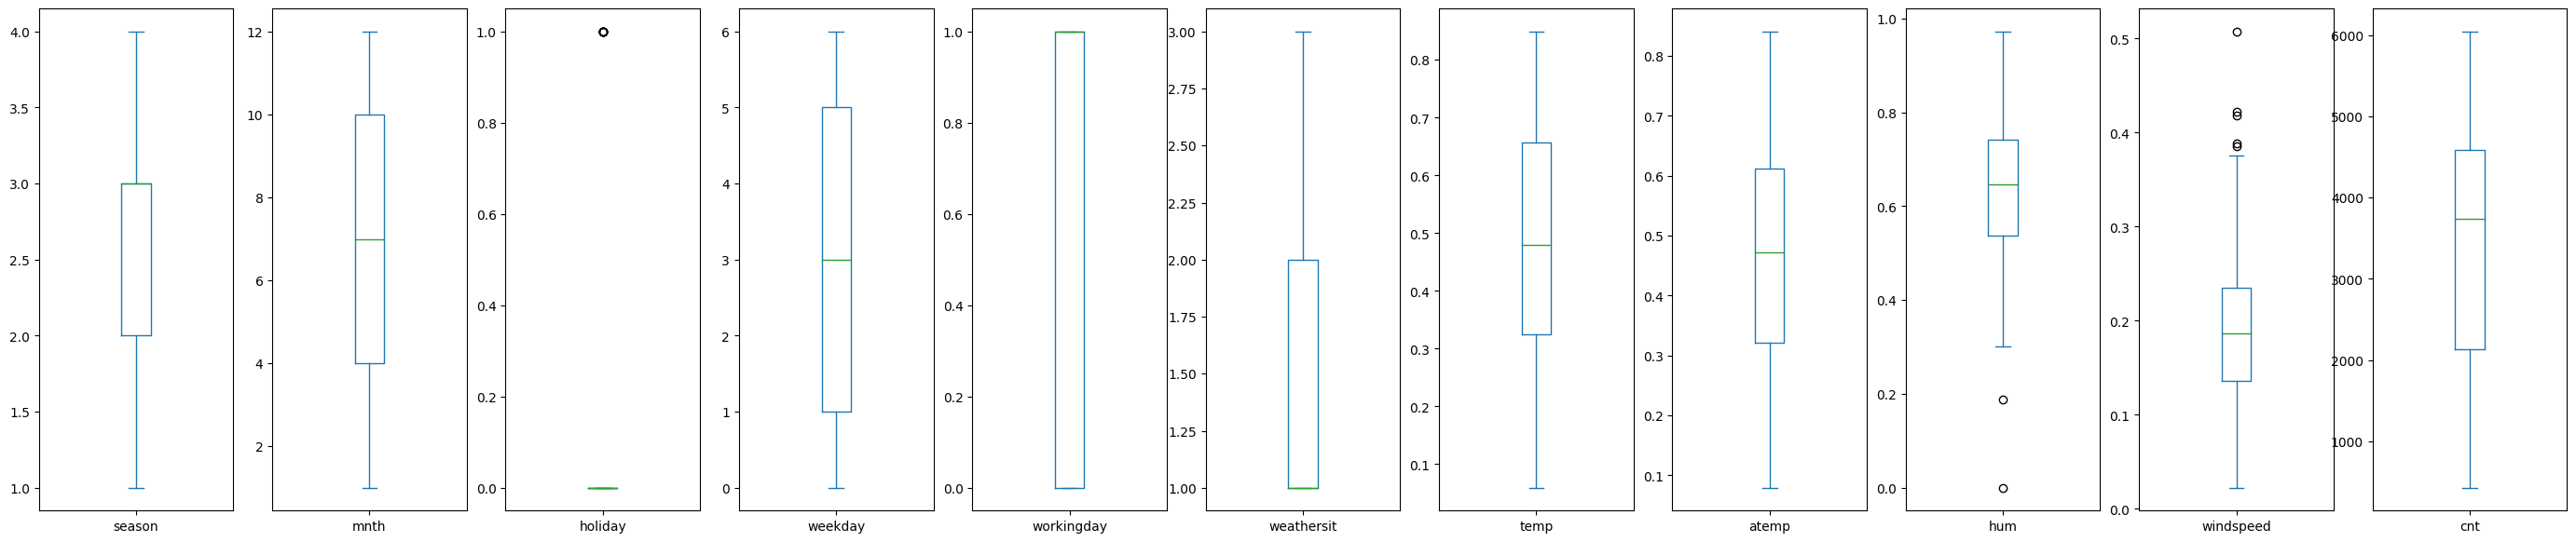

In [119]:
df.plot(kind="box", figsize=(35, 7), subplots=True, sharex=False, sharey=False);

We can see that most of our data is in well formed structure and the outliers mostly resides at 'hum' and 'windspead' columns. (later we deal 
with them).

Let Explore the data useing histograms - this will tell us more about the distribution of the data

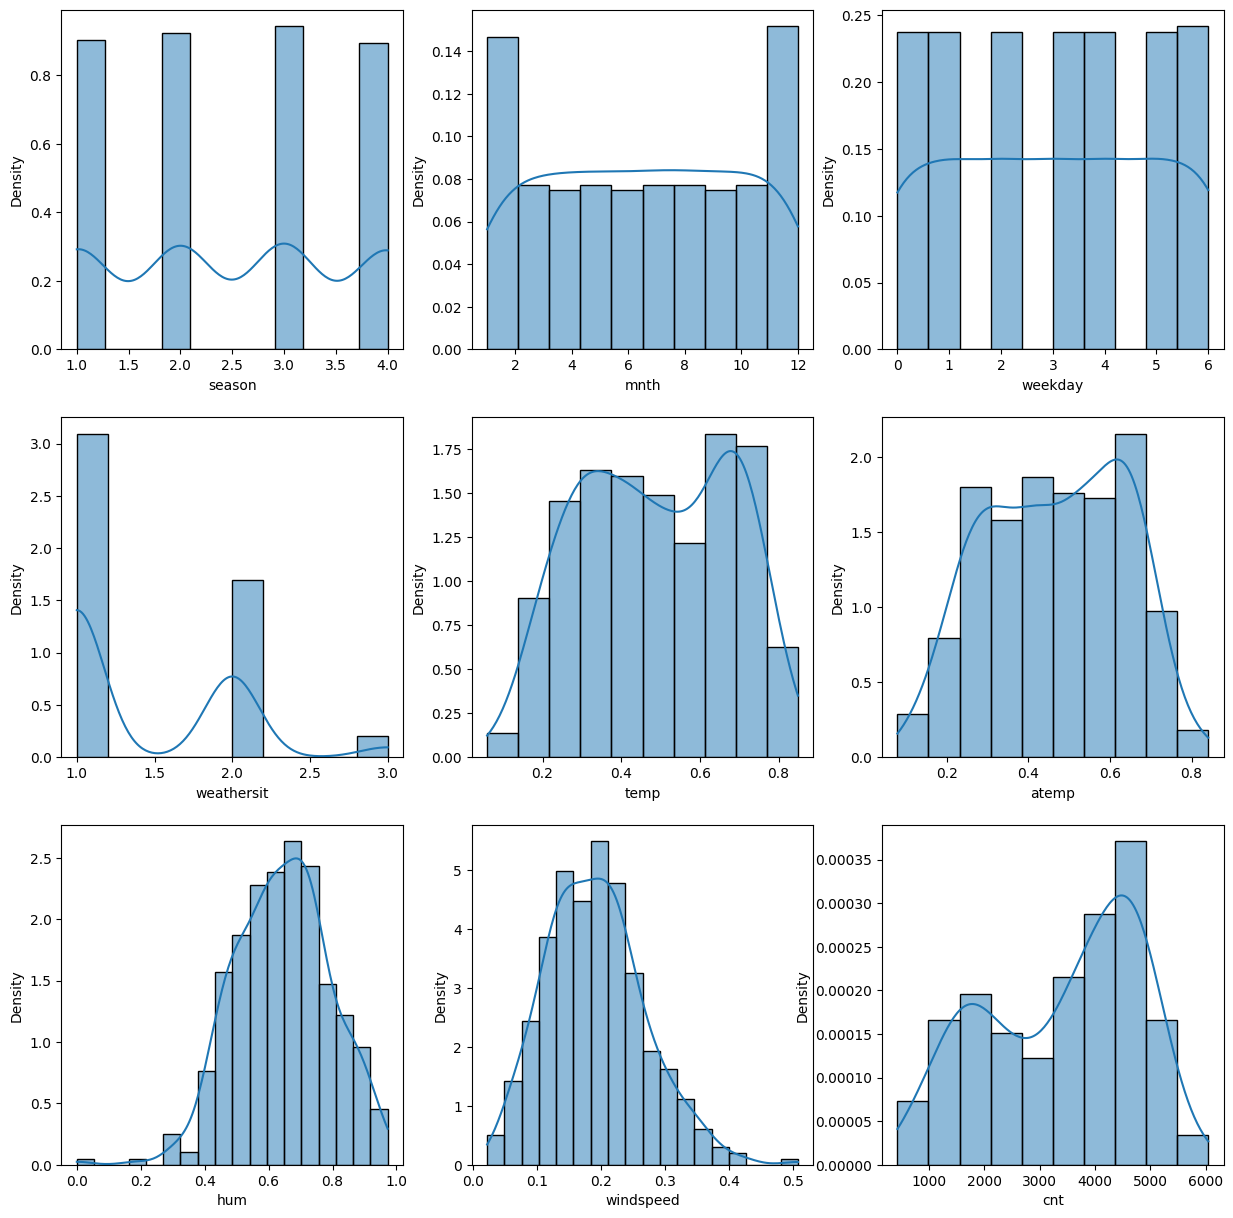

In [120]:
# Lets remove bool columns - histogram is not informative on bool columns
bool_collist = ['holiday', 'workingday']
numeric_df = df.drop(bool_collist, axis=1)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(numeric_df.columns) // 3, ncols=3, figsize=(15, 15))
axes = axes.ravel()  # flattening the array makes indexing easier

for col, axis in zip(numeric_df.columns, axes):
    sns.histplot(data=numeric_df, x=col, ax=axis, kde=True, stat='density')
plt.show()

Most of the columns normally distribute  - we will use this info later when start dealing with the data. 

Let's compare the mean rental rate over the weekday/mnth/season

In [121]:
def plot_agg_againts_target(df, agg_func, target_col, agg_col):
    """Plot the aggregation of a column against the target column"""
    agg_df = df.groupby(agg_col)[target_col].agg(agg_func)
    agg_df.plot(
        kind='bar',
        figsize=(5, 5),
        title=f'{agg_func.__name__} of {target_col} against {agg_col}',
        );

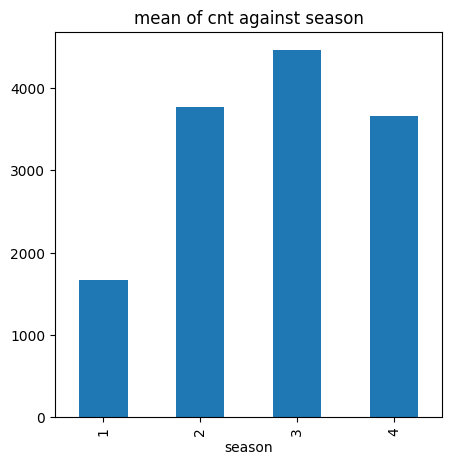

In [122]:
# Plot the mean of the target column against the season column
plot_agg_againts_target(df, np.mean, 'cnt', 'season')

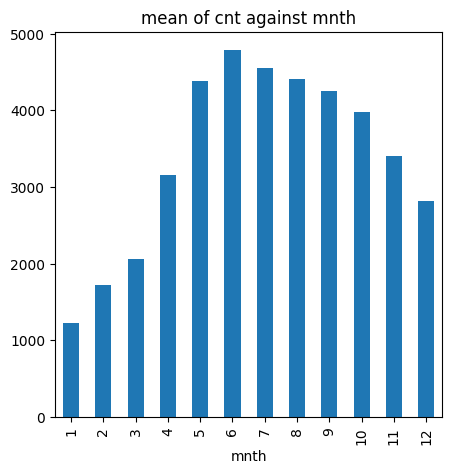

In [123]:
# Plot the mean of the target column against the mnth column
plot_agg_againts_target(df, np.mean, 'cnt', 'mnth')

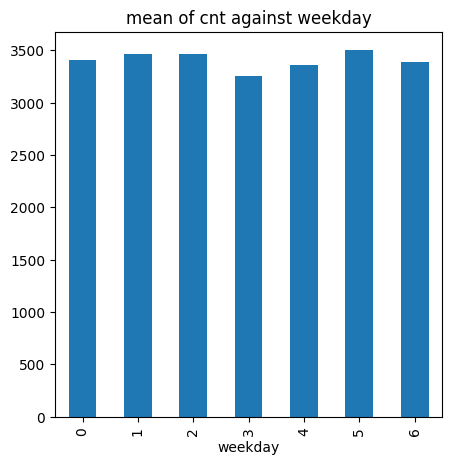

In [124]:
# Plot the mean of the target column against the weekday column
plot_agg_againts_target(df, np.mean, 'cnt', 'weekday')

Notice that as expected - the 'strong' months are the ones at summertime.

To further explore relationships between columns we generate a correlation matrix using <br>  pandas' [corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) function and a plot it with Seaborn's [heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function.

              season      mnth   holiday   weekday  workingday  weathersit  \
season      1.000000  0.831032  0.000207 -0.011705    0.007137    0.035508   
mnth        0.831032  1.000000  0.032808  0.012860   -0.004288    0.009729   
holiday     0.000207  0.032808  1.000000 -0.076087   -0.247461   -0.006442   
weekday    -0.011705  0.012860 -0.076087  1.000000    0.020445    0.047259   
workingday  0.007137 -0.004288 -0.247461  0.020445    1.000000    0.108654   
weathersit  0.035508  0.009729 -0.006442  0.047259    0.108654    1.000000   
temp        0.373380  0.288663 -0.019272 -0.039292    0.046799   -0.091175   
atemp       0.382972  0.301920 -0.026448 -0.042810    0.046158   -0.096894   
hum         0.249451  0.242533 -0.030896 -0.065932    0.034250    0.581476   
windspeed  -0.242514 -0.242443  0.000734  0.061525    0.011955    0.109310   
cnt         0.541794  0.444607 -0.049193 -0.004396    0.020661   -0.318274   

                temp     atemp       hum  windspeed       cnt  

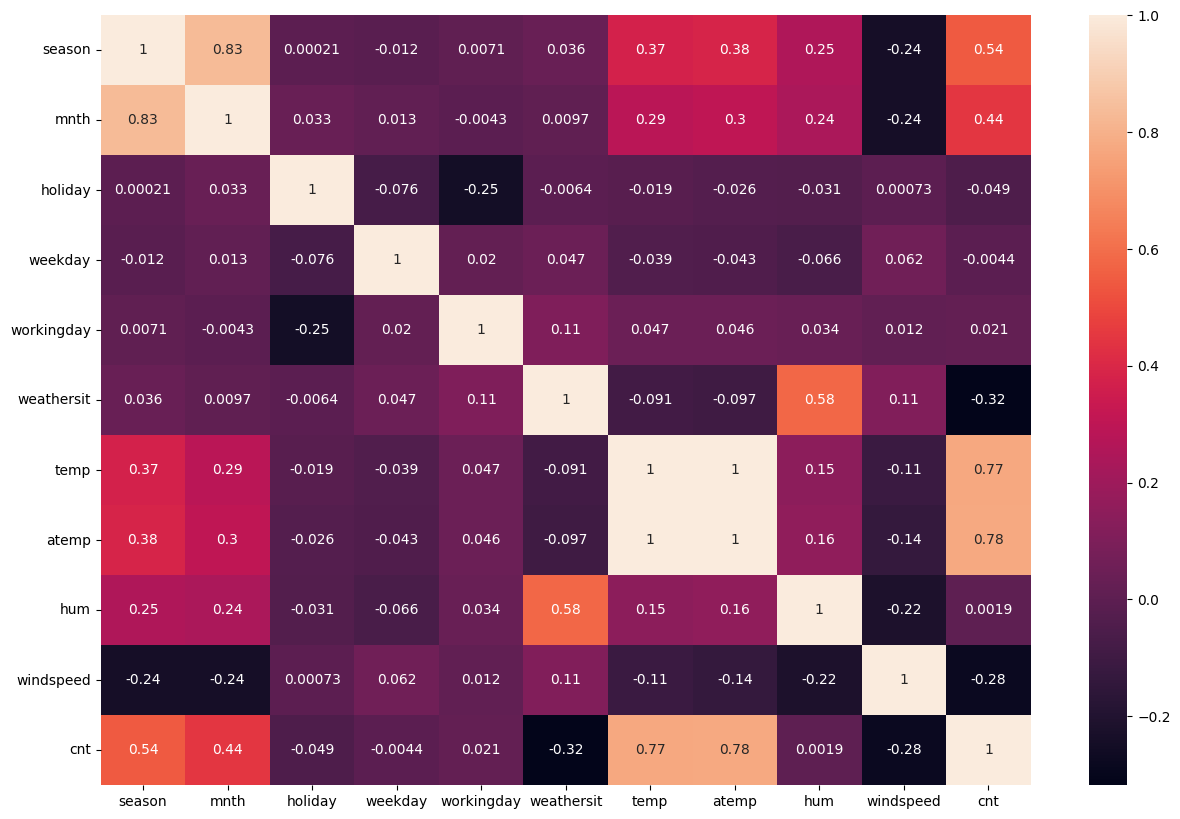

In [129]:
# Generate and print pairwise correlation of columns
cm = df.corr()
print(cm)

# Plot the correlation matrix nicely using Seaborn
plt.figure(figsize = (15,10))
sns.heatmap(cm, annot=True);
plt.show()